In [1]:
def r2_rmse_vals( Y_true, Y_pred, label ) :
    # (ypred-ytrue) squared numeratore
    diff_numeratore = []
    for idx, v in enumerate ( Y_pred ):
        diff_nu = v-Y_true[idx]
        diff_numeratore.append( diff_nu )
    diff_numeratore_SQUARED = []
    for v in diff_numeratore :
        v = v**2
        diff_numeratore_SQUARED.append( v )
    # numero elememti y_true ( per fare la media )
    num_elementi = 0
    for v in Y_true :
        num_elementi = num_elementi + 1
    # sommatoria elememti media 
    somma = 0
    for v in Y_true :
        somma = somma + v
    media = somma/num_elementi
    # sopra ho calcolato la media ( vedi denominatore )
    # sommatoria diff denominatore squared 
    diff_denominatore = []
    for idx, v in enumerate ( Y_true ):
        diff_de = v-media 
        diff_denominatore.append( diff_de )
    diff_denominatore_SQUARED = []
    for v in diff_denominatore :
        v = v**2
        diff_denominatore_SQUARED.append( v )
    sommatoria_numeratore = 0
    for v in diff_numeratore_SQUARED :
        sommatoria_numeratore = sommatoria_numeratore+v
    sommatoria_denominatore = 0
    for v in diff_denominatore_SQUARED :
        sommatoria_denominatore = sommatoria_denominatore+v
    # r2_val 
    r2 = 1-(sommatoria_numeratore/sommatoria_denominatore)
    print("r2 su",label,"set è :", r2 )
    # y_true-y_pred SQUARED 
    diff_rmse_numeratore = []
    for idx, v in enumerate ( Y_true ) :
        diff_rmse_numeratore.append( v-Y_pred[idx] )
    diff_rmse_numeratore_SQUARED = []
    for v in diff_rmse_numeratore :
        v = v**2
        diff_rmse_numeratore_SQUARED.append( v )
    sommatoria_diff_rmse = 0
    for v in diff_rmse_numeratore_SQUARED :
        sommatoria_diff_rmse = sommatoria_diff_rmse+v
    # RMSE
    rmse = (sommatoria_diff_rmse/num_elementi)**0.5
    print("rmse su",label,"set è :", rmse )   

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

file = './data/MOE_GRID_1078.xlsx'
df = pd.read_excel(open(file, "rb"))

rd = {"DESCRIPTOR" : "GRID_DESCRIPTOR"}
df.rename(columns = rd, inplace=True)

for v in df.columns:
    print("\""+v+"\"")


"Unnamed: 0"
"Unnamed: 0.1"
"UNIQUEID"
"SMILE"
"SETID"
"GRID_DESCRIPTOR"
"LOGD"
"mol"
"AM1_dipole"
"AM1_E"
"AM1_Eele"
"AM1_HF"
"AM1_HOMO"
"AM1_IP"
"AM1_LUMO"
"apol"
"ASA"
"ASA+"
"ASA-"
"ASA_H"
"ASA_P"
"ast_fraglike"
"ast_fraglike_ext"
"ast_violation"
"ast_violation_ext"
"a_acc"
"a_acid"
"a_aro"
"a_base"
"a_count"
"a_don"
"a_donacc"
"a_heavy"
"a_hyd"
"a_IC"
"a_ICM"
"a_nB"
"a_nBr"
"a_nC"
"a_nCl"
"a_nF"
"a_nH"
"a_nI"
"a_nN"
"a_nO"
"a_nP"
"a_nS"
"balabanJ"
"BCUT_PEOE_0"
"BCUT_PEOE_1"
"BCUT_PEOE_2"
"BCUT_PEOE_3"
"BCUT_SLOGP_0"
"BCUT_SLOGP_1"
"BCUT_SLOGP_2"
"BCUT_SLOGP_3"
"BCUT_SMR_0"
"BCUT_SMR_1"
"BCUT_SMR_2"
"BCUT_SMR_3"
"bpol"
"b_1rotN"
"b_1rotR"
"b_ar"
"b_count"
"b_double"
"b_heavy"
"b_max1len"
"b_rotN"
"b_rotR"
"b_single"
"b_triple"
"CASA+"
"CASA-"
"chi0"
"chi0v"
"chi0v_C"
"chi0_C"
"chi1"
"chi1v"
"chi1v_C"
"chi1_C"
"chiral"
"chiral_u"
"DASA"
"DCASA"
"dens"
"density"
"diameter"
"dipole"
"dipoleX"
"dipoleY"
"dipoleZ"
"E"
"E_ang"
"E_ele"
"E_nb"
"E_oop"
"E_rele"
"E_rnb"
"E_rsol"
"E_rvdw"
"E

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,UNIQUEID,SMILE,SETID,GRID_DESCRIPTOR,LOGD,mol,AM1_dipole,AM1_E,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,0,0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,1 0 0 0 0 0 0 0 ...,-0.960,Fc1c(N2CCNCC2)cc2N(C3CC3)C=C(C(=O)O)C(=O)c2c1,7.750276,-103541.820,...,75.625,12.500,4.500,0.625,0.0,0.0,331.34698,1234,43,134
1,1,1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,1 0 0 0 0 0 0 0 ...,-0.920,O=S1(=O)N(C)CCN1c1cc2c(CCN(C)C)c[nH]c2cc1,4.358144,-89582.016,...,74.125,10.500,2.500,0.000,0.0,0.0,322.43298,1055,35,120
2,2,2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,1 0 0 0 0 0 0 0 ...,-0.900,O=C1C(O)=C(C)N(CCCO)C=C1,5.544390,-57643.316,...,29.625,6.125,1.125,0.000,0.0,0.0,183.20700,254,18,60
3,3,3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,1 0 0 0 0 0 0 0 ...,-0.830,Fc1c(N2CCNCC2)cc2N(c3c(C)cccc3)C=C(C(=O)O)C(=O...,8.887918,-116000.170,...,84.375,11.500,4.125,0.625,0.0,0.0,381.40698,1842,51,152
4,4,4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,1 0 0 0 0 0 0 0 ...,-0.820,O=C(NCC)CCN1C(C)=C(O)C(=O)C=C1,6.219123,-69271.062,...,56.875,14.125,3.125,0.000,0.0,0.0,224.25999,483,22,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1086,1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1 0 0 0 0 0 0 0 ...,1.000,O(C[C@@H](O)CNC(C)C)c1c(CC=C)cccc1,0.588812,-71140.453,...,56.500,14.250,3.625,0.750,0.0,0.0,249.35399,711,21,80
1074,1087,1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC)...,Tr,1 0 0 0 0 0 0 0 ...,1.140,O=C(N1CCN(c2nc(N)c3c(n2)cc(OC)c(OC)c3)CC1)[C@H...,2.551292,-117421.360,...,126.125,25.375,8.875,1.375,0.0,0.0,387.44000,2195,47,150
1075,1088,1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1 0 0 0 0 0 0 0 ...,1.415,O=C1Oc2c(cccc2)C=C1,4.817789,-43230.504,...,2.875,0.000,0.000,0.000,0.0,0.0,146.14499,144,14,56
1076,1089,1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1 0 0 0 0 0 0 0 ...,1.670,Clc1c(C=N/N=C(\N)/N)c(Cl)ccc1,2.182817,-62454.488,...,156.875,43.875,12.250,0.875,0.0,0.0,231.08600,331,17,64


In [4]:
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "GRID_DESCRIPTOR"]

basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(df["UNIQUEID"]):
    
    fdesc = df[df["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "GRID_DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = df[df["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = df[df["UNIQUEID"] == ss]['SETID'].values[0]
    uid = df[df["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)

for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )  

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 28)
GM  : 
   (1078,) (1078, 1907)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 28)
MTr  : 
   (865,) (865, 28)
GMTe  : 
   (213,) (213, 1907)
GMTr  : 
   (865,) (865, 1907)


In [5]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
import math

###################################################################################

def absdiff (yc, ytlist):
    
    diff = []
    diffnoa = []
    for idx, v in enumerate(ytlist):
        d = math.fabs(v-yc[idx])
        diff.append(d)
        d = v-yc[idx]
        diffnoa.append(d)
            
    return np.average(diff), np.std(diff), np.std(diffnoa)

###################################################################################

def mainrunpls (X, Y, trname, tename, mcomp, cvval, maxcomp=27):
    
    print("Running GRID model using cv = %3d"%(cvval))
    
    trscores = []
    trncomps =[]
    trmses = []
    
    for trncomp in range(1,maxcomp+1):
            pls = PLSRegression(trncomp,scale=True)
            pls.fit(X[trname], Y[trname])
        
            y_cv = cross_val_predict(pls, X[trname], Y[trname], cv=cvval)
            trscore = r2_score(Y[trname], y_cv)
            trmse = mean_squared_error(Y[trname], y_cv)
        
            trscores.append(trscore)
            trmses.append(trmse)
            trncomps.append(trncomp)
            print("%4d %10.8f %10.8f"%(trncomp, trmse, trscore))
    
    msetrmin = np.argmin(trmses)
    
    plt.plot(trncomps, trscores, '-o', color='black')
    plt.xlabel('number of components tr')
    plt.ylabel('scores tr')
    plt.xticks(trncomps)
    plt.show()
    
    plt.plot(trncomps, trmses, '-o', color='black')
    plt.xlabel('number of components tr')
    plt.ylabel('MSE tr')
    plt.xticks(trncomps)
    plt.show()

    acomp = msetrmin+1
    print("Number of components selected automatically: ",  acomp)
    print("     Number of components selected manually: ",  mcomp)
        
    pls_auto = PLSRegression(acomp, scale=True)
    pls_auto.fit(X[trname], Y[trname])
    y_auto_te = pls_auto.predict(X[tename])
    y_auto_tr = pls_auto.predict(X[trname])
    y_cv_auto_tr = cross_val_predict( pls_auto, X[trname], Y[trname], cv=10)
    cvs_auto_tr = cross_val_score( pls_auto, X[trname],Y[trname], cv=10 )
    q2_r2_auto = r2_score( Y[trname], y_cv_auto_tr)
    y_auto = np.concatenate((y_auto_te, y_auto_tr))
    y_auto_true = []
    y_auto_true.extend(Y[tename])
    y_auto_true.extend(Y[trname])
    r2_rmse_vals( Y[trname], y_auto_tr, "Tr Auto" )
    r2_rmse_vals( Y[tename], y_auto_te, "Te Auto" )
    r2_rmse_vals( y_auto_true, y_auto, "Tot Auto" )
    
    plt.figure( figsize=(5,5) )
    plt.scatter( y_auto_true, y_auto )
    plt.xlabel("Y_auto_True")
    plt.ylabel("Y_auto_predicted")
    plt.show()
    
    plt.figure( figsize=(5,5) )
    plt.scatter( Y[trname], y_auto_tr )
    plt.xlabel("Y_auto_True_Tr")
    plt.ylabel("Y_auto_predicted_Tr")
    plt.show()
    
    plt.figure( figsize=(5,5) )
    plt.scatter( Y[tename], y_auto_te )
    plt.xlabel("Y_auto_True_Te")
    plt.ylabel("Y_auto_predicted_Te")
    plt.show()

    
    avg, std, stdnoa = absdiff (y_auto_tr, Y[trname])
    print("Auto model TrainSet %10.5f %10.5f %10.5f"%(avg, std, stdnoa))    
    avg, std, stdnoa = absdiff (y_auto_te, Y[tename])
    print("Auto model  TestSet %10.5f %10.5f %10.5f"%(avg, std, stdnoa))
    avg, std, stdnoa = absdiff (y_auto, y_auto_true)
    print("Auto model  FullSet %10.5f %10.5f %10.5f"%(avg, std, stdnoa))

        
    pls_manu = PLSRegression(mcomp, scale=True)
    pls_manu.fit(X[trname], Y[trname])
    y_manu_te = pls_manu.predict(X[tename])
    y_manu_tr = pls_manu.predict(X[trname])
    y_cv_manu_tr = cross_val_predict( pls_manu, X[trname], Y[trname], cv=10)
    cvs_manu_tr = cross_val_score( pls_manu, X[trname],Y[trname], cv=10 )
    q2_r2_manu = r2_score( Y[trname], y_cv_manu_tr)
    y_manu = np.concatenate((y_manu_te, y_manu_tr))
    y_manu_true = []
    y_manu_true.extend(Y[tename])
    y_manu_true.extend(Y[trname])
    r2_rmse_vals( Y[trname], y_manu_tr, "Tr manu" )
    r2_rmse_vals( Y[tename], y_manu_te, "Te manu" )
    r2_rmse_vals( y_manu_true, y_manu, "Tot manu" )
    
    plt.figure( figsize=(5,5) )
    plt.scatter( y_manu_true, y_manu )
    plt.xlabel("Y_manu_True")
    plt.ylabel("Y_manu_predicted")
    plt.show()
    
    plt.figure( figsize=(5,5) )
    plt.scatter( Y[trname], y_manu_tr )
    plt.xlabel("Y_manu_True_Tr")
    plt.ylabel("Y_manu_predicted_Tr")
    plt.show()
    
    plt.figure( figsize=(5,5) )
    plt.scatter( Y[tename], y_manu_te )
    plt.xlabel("Y_manu_True_Te")
    plt.ylabel("Y_manu_predicted_Te")
    plt.show()
        
    avg, std, stdnoa = absdiff (y_manu_tr, Y[trname])
    print("Manual model TrainSet %10.5f %10.5f %10.5f"%(avg, std, stdnoa))
    avg, std, stdnoa = absdiff (y_manu_te, Y[tename])
    print("Manual model  TestSet %10.5f %10.5f %10.5f"%(avg, std, stdnoa))
    avg, std, stdnoa = absdiff (y_manu, y_manu_true)
    print("Manual model  FullSet %10.5f %10.5f %10.5f"%(avg, std, stdnoa))


###################################################################################



Running GRID model using cv =  10
   1 1.87513100 0.46408395
   2 1.46879385 0.58021589
   3 1.32194448 0.62218573
   4 1.21643614 0.65234021
   5 1.21652130 0.65231587
   6 1.21332723 0.65322874
   7 1.21297459 0.65332953
   8 1.21161278 0.65371874
   9 1.21296449 0.65333242
  10 1.21329547 0.65323782
  11 1.21442555 0.65291484
  12 1.21437165 0.65293025
  13 1.21422757 0.65297143
  14 1.21431839 0.65294547
  15 1.21432903 0.65294243
  16 1.21433783 0.65293991
  17 1.21433305 0.65294128
  18 1.21433814 0.65293982
  19 1.21434044 0.65293917
  20 1.21434038 0.65293918


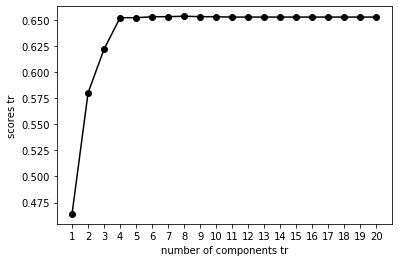

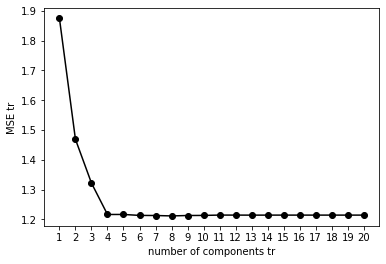

Number of components selected automatically:  8
     Number of components selected manually:  4
r2 su Tr Auto set è : [0.99986485]
rmse su Tr Auto set è : [0.02174561]
r2 su Te Auto set è : [0.77959688]
rmse su Te Auto set è : [0.80129702]
r2 su Tot Auto set è : [0.96242775]
rmse su Tot Auto set è : [0.35671587]


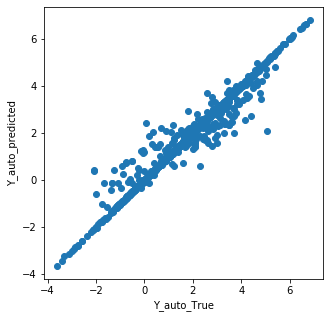

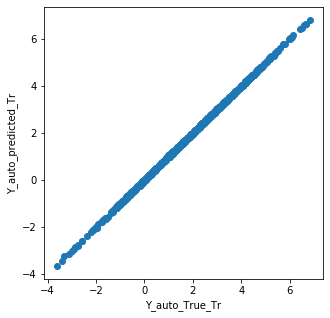

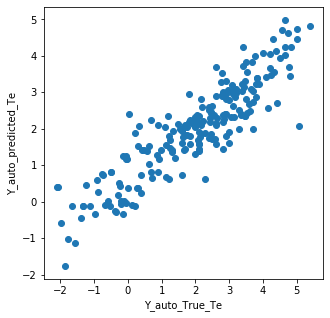

Auto model TrainSet    0.01684    0.01376    0.02175
Auto model  TestSet    0.60622    0.52400    0.80034
Auto model  FullSet    0.13330    0.33088    0.35663
r2 su Tr manu set è : [0.98739877]
rmse su Tr manu set è : [0.20997801]
r2 su Te manu set è : [0.77142674]
rmse su Te manu set è : [0.81601355]
r2 su Tot manu set è : [0.95070475]
rmse su Tot manu set è : [0.4085934]


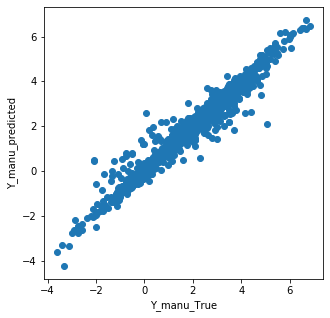

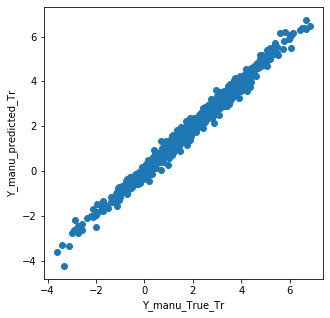

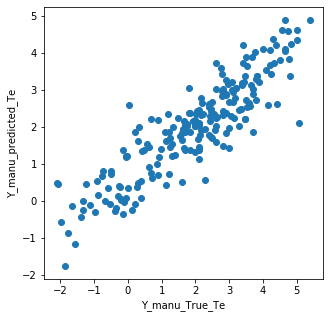

Manual model TrainSet    0.16188    0.13374    0.20998
Manual model  TestSet    0.62121    0.52913    0.81527
Manual model  FullSet    0.25263    0.32113    0.40854


In [6]:
trname = "GTr"
tename = "GTe"
manualcomp = 4
cvlist = 10

mainrunpls (X, Y, trname, tename, manualcomp, cvlist, 20)

Running GRID model using cv =   5
   1 2.18358883 0.37592611
   2 1.82539091 0.47829977
   3 1.62697514 0.53500738
   4 1.47958732 0.57713110
   5 1.48435103 0.57576962
   6 1.47966953 0.57710760
   7 1.48525444 0.57551142
   8 1.48819659 0.57467055
   9 1.48914512 0.57439946
  10 1.48871050 0.57452368
  11 1.48880358 0.57449707
  12 1.48846032 0.57459518
  13 1.48845975 0.57459534
  14 1.48872084 0.57452072
  15 1.48870126 0.57452632
  16 1.48867686 0.57453329
  17 1.48868491 0.57453099
  18 1.48869142 0.57452913
  19 1.48869847 0.57452711
  20 1.48869896 0.57452697


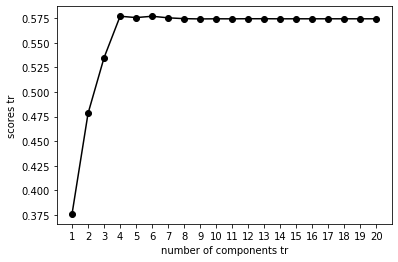

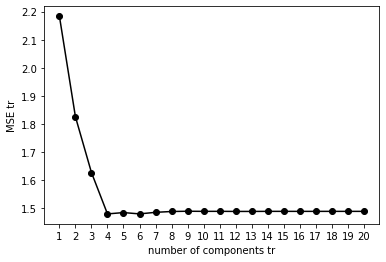

Number of components selected automatically:  4
     Number of components selected manually:  4
r2 su Tr Auto set è : [0.98739877]
rmse su Tr Auto set è : [0.20997801]
r2 su Te Auto set è : [0.77142674]
rmse su Te Auto set è : [0.81601355]
r2 su Tot Auto set è : [0.95070475]
rmse su Tot Auto set è : [0.4085934]


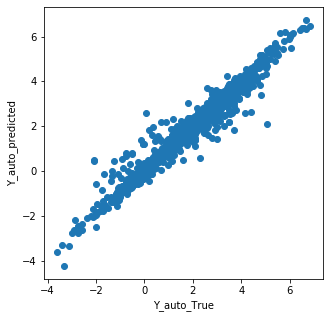

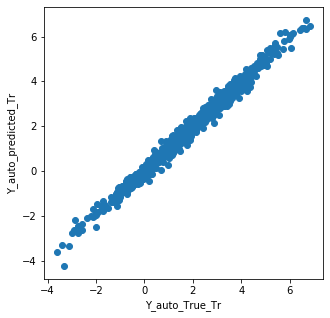

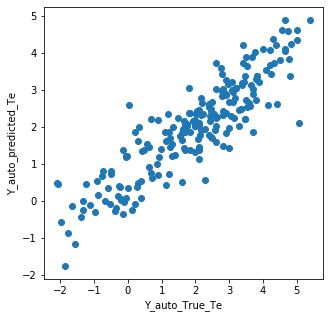

Auto model TrainSet    0.16188    0.13374    0.20998
Auto model  TestSet    0.62121    0.52913    0.81527
Auto model  FullSet    0.25263    0.32113    0.40854
r2 su Tr manu set è : [0.98739877]
rmse su Tr manu set è : [0.20997801]
r2 su Te manu set è : [0.77142674]
rmse su Te manu set è : [0.81601355]
r2 su Tot manu set è : [0.95070475]
rmse su Tot manu set è : [0.4085934]


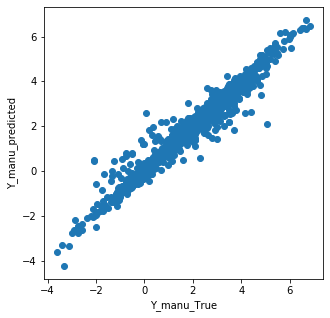

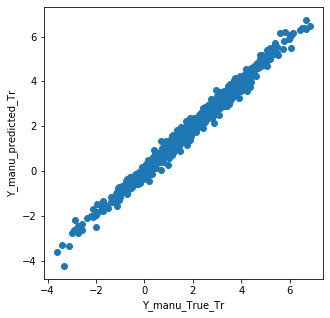

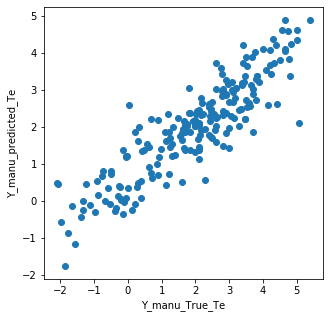

Manual model TrainSet    0.16188    0.13374    0.20998
Manual model  TestSet    0.62121    0.52913    0.81527
Manual model  FullSet    0.25263    0.32113    0.40854


In [7]:
trname = "GTr"
tename = "GTe"
manualcomp = 4
cvlist = 5

mainrunpls (X, Y, trname, tename, manualcomp, cvlist, 20)

Running GRID model using cv =  10
   1 2.29924163 0.34287232
   2 1.57121276 0.55094437
   3 1.19288705 0.65907059
   4 1.01841918 0.70893384
   5 0.87167585 0.75087337
   6 0.78052598 0.77692417
   7 0.73748177 0.78922629
   8 0.68009981 0.80562617
   9 0.66117656 0.81103447
  10 0.64695446 0.81509917
  11 0.62612335 0.82105274
  12 0.63113569 0.81962021
  13 0.61216552 0.82504192
  14 0.60628718 0.82672196
  15 0.59813305 0.82905242
  16 0.60169016 0.82803580
  17 0.60132839 0.82813919
  18 0.60288607 0.82769400
  19 0.59997954 0.82852469
  20 0.60136664 0.82812826
  21 0.60069074 0.82832143
  22 0.60117375 0.82818339
  23 0.60093337 0.82825209
  24 0.60095321 0.82824642
  25 0.60088995 0.82826450
  26 0.60089377 0.82826341
  27 0.60088666 0.82826544


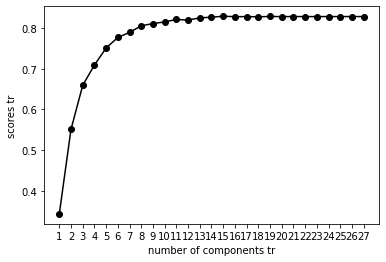

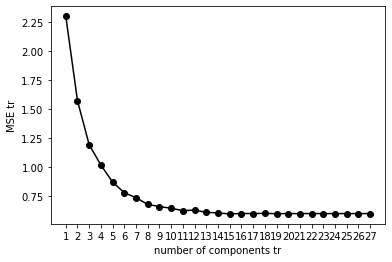

Number of components selected automatically:  15
     Number of components selected manually:  13
r2 su Tr Auto set è : [0.8637027]
rmse su Tr Auto set è : [0.69057532]
r2 su Te Auto set è : [0.80560388]
rmse su Te Auto set è : [0.75253804]
r2 su Tot Auto set è : [0.85396952]
rmse su Tot Auto set è : [0.70325134]


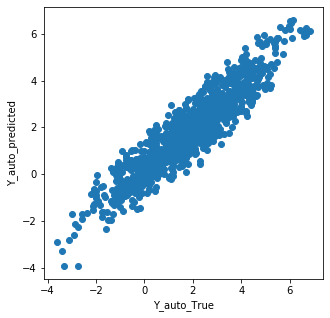

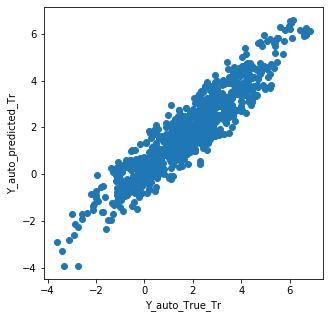

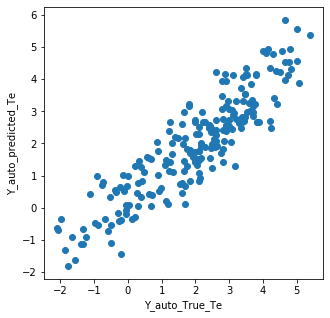

Auto model TrainSet    0.55903    0.40544    0.69058
Auto model  TestSet    0.61521    0.43339    0.75251
Auto model  FullSet    0.57013    0.41172    0.70325
r2 su Tr manu set è : [0.86164104]
rmse su Tr manu set è : [0.6957786]
r2 su Te manu set è : [0.80365482]
rmse su Te manu set è : [0.75630118]
r2 su Tot manu set è : [0.85192914]
rmse su Tot manu set è : [0.70814731]


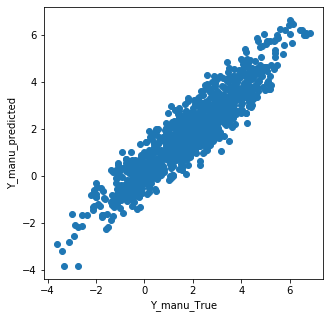

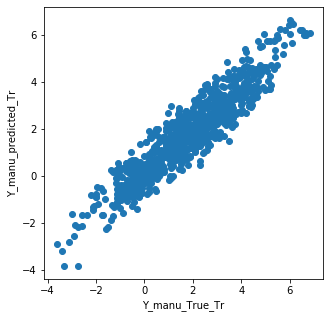

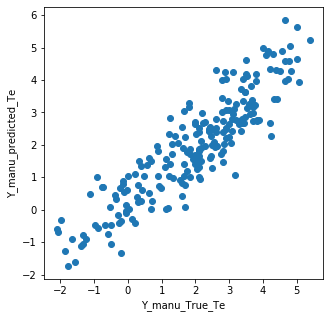

Manual model TrainSet    0.56303    0.40879    0.69578
Manual model  TestSet    0.61173    0.44473    0.75626
Manual model  FullSet    0.57265    0.41659    0.70815


In [8]:
trname = "MTr"
tename = "MTe"
manualcomp = 13
cvlist = 10

mainrunpls (X, Y, trname, tename, manualcomp, cvlist, 27)

Running GRID model using cv =   5
   1 2.29051552 0.34536626
   2 1.67485649 0.52132279
   3 1.28186642 0.63364011
   4 1.09382021 0.68738408
   5 0.91427592 0.73869818
   6 0.81281293 0.76769650
   7 0.76265847 0.78203074
   8 0.72711260 0.79218982
   9 0.70169690 0.79945368
  10 0.68398739 0.80451509
  11 0.67873772 0.80601546
  12 0.67529106 0.80700052
  13 0.66236905 0.81069365
  14 0.65633128 0.81241926
  15 0.65530846 0.81271158
  16 0.65269991 0.81345711
  17 0.66047280 0.81123560
  18 0.65728628 0.81214632
  19 0.65486868 0.81283727
  20 0.65685611 0.81226926
  21 0.65685711 0.81226897
  22 0.65725035 0.81215659
  23 0.65575496 0.81258397
  24 0.65536041 0.81269673
  25 0.65520653 0.81274071
  26 0.65519471 0.81274409
  27 0.65517188 0.81275062


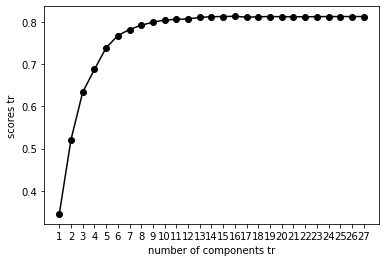

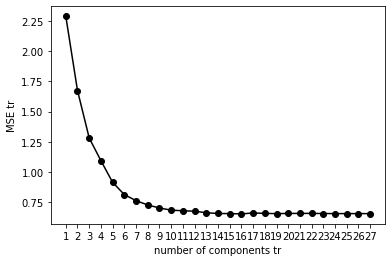

Number of components selected automatically:  16
     Number of components selected manually:  13
r2 su Tr Auto set è : [0.86443383]
rmse su Tr Auto set è : [0.68872064]
r2 su Te Auto set è : [0.80696007]
rmse su Te Auto set è : [0.74990842]
r2 su Tot Auto set è : [0.85480612]
rmse su Tot Auto set è : [0.70123399]


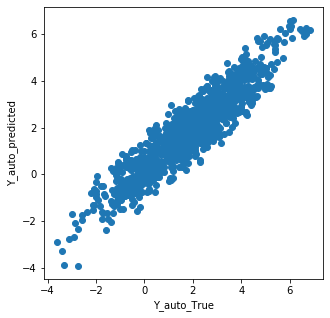

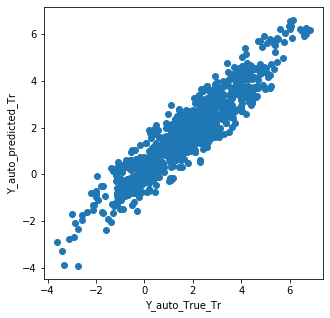

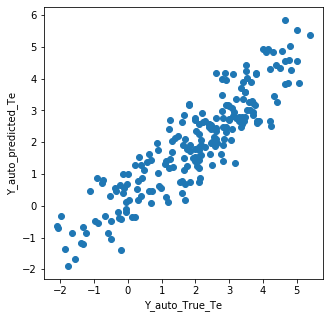

Auto model TrainSet    0.55713    0.40489    0.68872
Auto model  TestSet    0.61149    0.43410    0.74987
Auto model  FullSet    0.56787    0.41140    0.70123
r2 su Tr manu set è : [0.86164104]
rmse su Tr manu set è : [0.6957786]
r2 su Te manu set è : [0.80365482]
rmse su Te manu set è : [0.75630118]
r2 su Tot manu set è : [0.85192914]
rmse su Tot manu set è : [0.70814731]


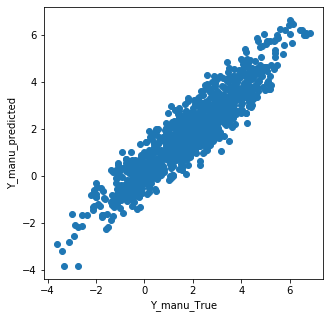

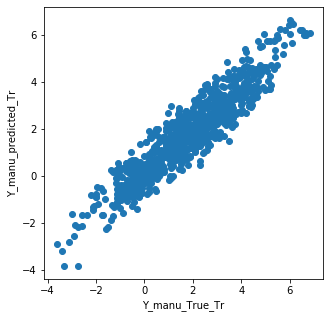

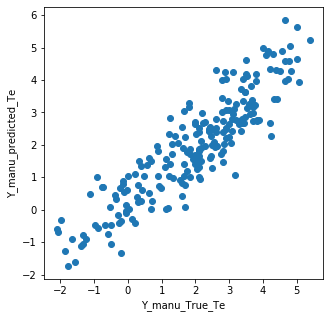

Manual model TrainSet    0.56303    0.40879    0.69578
Manual model  TestSet    0.61173    0.44473    0.75626
Manual model  FullSet    0.57265    0.41659    0.70815


In [9]:
trname = "MTr"
tename = "MTe"
manualcomp = 13
cvlist = 5

mainrunpls (X, Y, trname, tename, manualcomp, cvlist, 27)

Running GRID model using cv =  10
   1 1.66208502 0.52497290
   2 1.14639821 0.67235719
   3 0.94596183 0.72964229
   4 0.84649472 0.75807018
   5 0.81182879 0.76797777
   6 0.80697799 0.76936414
   7 0.81110362 0.76818502
   8 0.80950744 0.76864122
   9 0.81028199 0.76841985
  10 0.81138529 0.76810452
  11 0.81210068 0.76790006
  12 0.81240571 0.76781289
  13 0.81228013 0.76784878
  14 0.81233261 0.76783378
  15 0.81235022 0.76782874
  16 0.81238379 0.76781915
  17 0.81237426 0.76782188
  18 0.81237566 0.76782147
  19 0.81237609 0.76782135
  20 0.81237745 0.76782096
  21 0.81237653 0.76782122
  22 0.81237703 0.76782108
  23 0.81237706 0.76782107
  24 0.81237714 0.76782105
  25 0.81237718 0.76782104
  26 0.81237713 0.76782105
  27 0.81237714 0.76782105


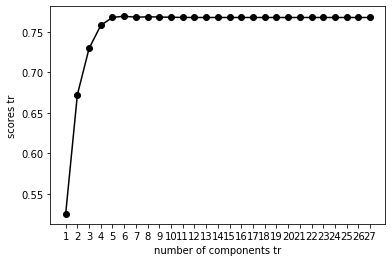

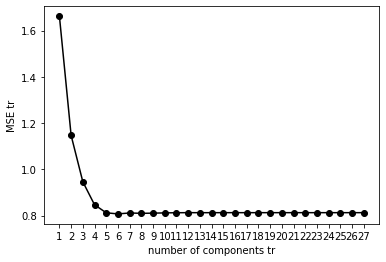

Number of components selected automatically:  6
     Number of components selected manually:  5
r2 su Tr Auto set è : [0.99700801]
rmse su Tr Auto set è : [0.10231689]
r2 su Te Auto set è : [0.84236271]
rmse su Te Auto set è : [0.67766356]
r2 su Tot Auto set è : [0.97072725]
rmse su Tot Auto set è : [0.31486223]


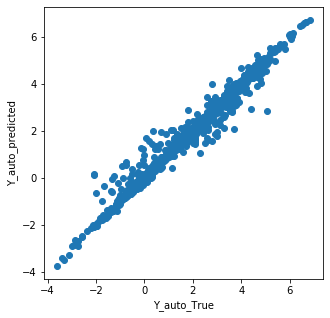

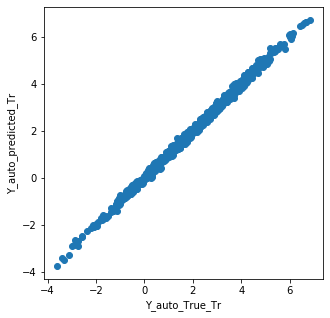

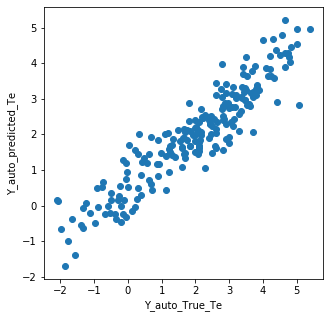

Auto model TrainSet    0.07977    0.06408    0.10232
Auto model  TestSet    0.52198    0.43216    0.67587
Auto model  FullSet    0.16714    0.26684    0.31471
r2 su Tr manu set è : [0.99166489]
rmse su Tr manu set è : [0.17077453]
r2 su Te manu set è : [0.84148856]
rmse su Te manu set è : [0.67953991]
r2 su Tot manu set è : [0.96614923]
rmse su Tot manu set è : [0.3385892]


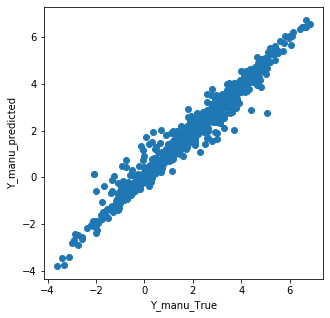

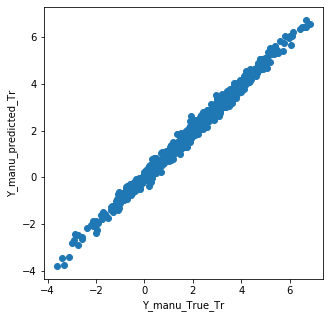

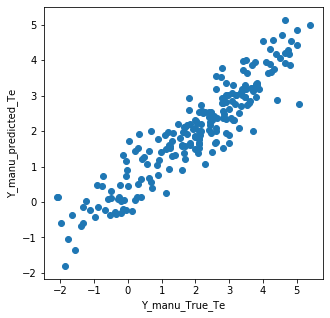

Manual model TrainSet    0.13278    0.10739    0.17077
Manual model  TestSet    0.52364    0.43310    0.67824
Manual model  FullSet    0.21001    0.26559    0.33849


In [10]:
trname = "GMTr"
tename = "GMTe"
manualcomp = 5
cvlist = 10

mainrunpls (X, Y, trname, tename, manualcomp, cvlist, 27)

Running GRID model using cv =   5
   1 1.81725235 0.48062578
   2 1.37748660 0.60631168
   3 1.17212484 0.66500447
   4 1.01729775 0.70925435
   5 0.98458749 0.71860300
   6 0.97946891 0.72006590
   7 0.98360466 0.71888390
   8 0.98997801 0.71706238
   9 0.98990200 0.71708411
  10 0.99101931 0.71676478
  11 0.99066194 0.71686691
  12 0.99065226 0.71686968
  13 0.99051586 0.71690866
  14 0.99067181 0.71686409
  15 0.99078888 0.71683063
  16 0.99077000 0.71683603
  17 0.99075943 0.71683905
  18 0.99075286 0.71684093
  19 0.99076411 0.71683771
  20 0.99076709 0.71683686
  21 0.99076849 0.71683646
  22 0.99076792 0.71683662
  23 0.99076794 0.71683662
  24 0.99076811 0.71683657
  25 0.99076799 0.71683660
  26 0.99076803 0.71683659
  27 0.99076806 0.71683658


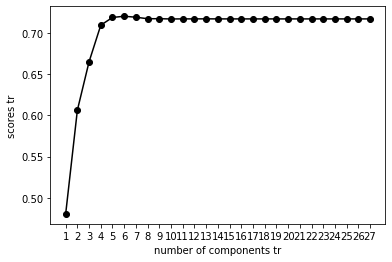

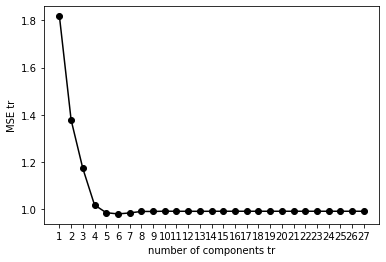

Number of components selected automatically:  6
     Number of components selected manually:  5
r2 su Tr Auto set è : [0.99700801]
rmse su Tr Auto set è : [0.10231689]
r2 su Te Auto set è : [0.84236271]
rmse su Te Auto set è : [0.67766356]
r2 su Tot Auto set è : [0.97072725]
rmse su Tot Auto set è : [0.31486223]


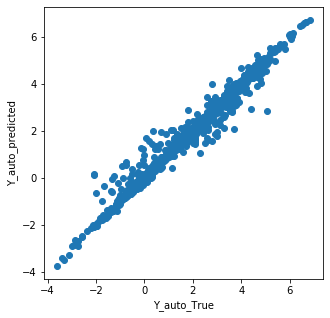

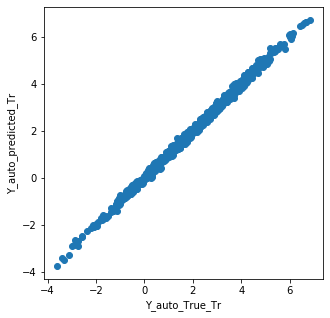

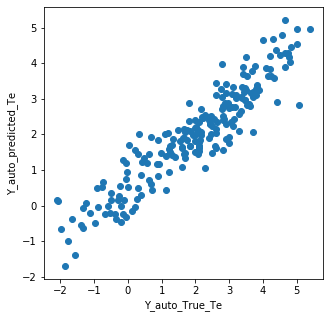

Auto model TrainSet    0.07977    0.06408    0.10232
Auto model  TestSet    0.52198    0.43216    0.67587
Auto model  FullSet    0.16714    0.26684    0.31471
r2 su Tr manu set è : [0.99166489]
rmse su Tr manu set è : [0.17077453]
r2 su Te manu set è : [0.84148856]
rmse su Te manu set è : [0.67953991]
r2 su Tot manu set è : [0.96614923]
rmse su Tot manu set è : [0.3385892]


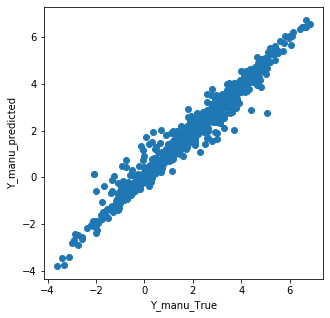

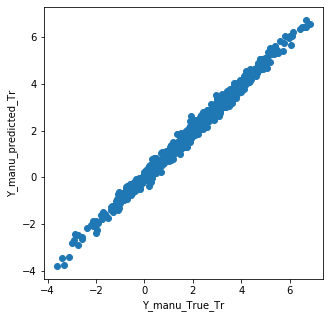

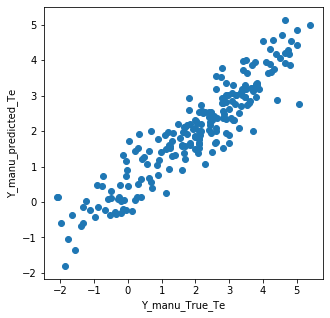

Manual model TrainSet    0.13278    0.10739    0.17077
Manual model  TestSet    0.52364    0.43310    0.67824
Manual model  FullSet    0.21001    0.26559    0.33849


In [11]:
trname = "GMTr"
tename = "GMTe"
manualcomp = 5
cvlist = 5

mainrunpls (X, Y, trname, tename, manualcomp, cvlist, 27)